# Testes de Hipóteses

É uma regra de decisões que permitem avaliar a razoabilidade das hipóteses sobres os parâmetros populacionais e aceita-las ou rejeita-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

In [59]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:

data = pd.read_csv('datasets\\teste_hipo.csv')

In [4]:
data.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# 1. Testes de normalidade

In [5]:
from scipy.stats import normaltest

A função _normaltest_ testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

**Definindo a significância do teste ($a$)**

In [7]:
significancia = 0.05

**Testando variável renda**

<Axes: >

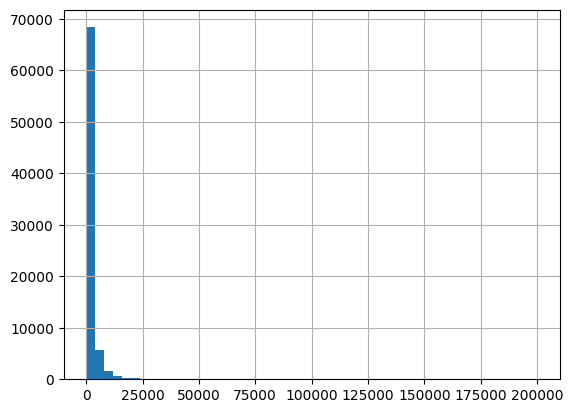

In [8]:
data.Renda.hist(bins=50)

**Critério do valor $p$**

Rejeita $H_0$ se o valor de $p <= 0,05$

In [9]:
normaltest(data.Renda)

NormaltestResult(statistic=152380.75803960307, pvalue=0.0)

In [11]:
# atribui os 2 outputs as 2 variáveis
stats_test, p_valor = normaltest(data.Renda)

In [12]:
p_valor <= significancia

True

**Teestando a variável altura**

<Axes: >

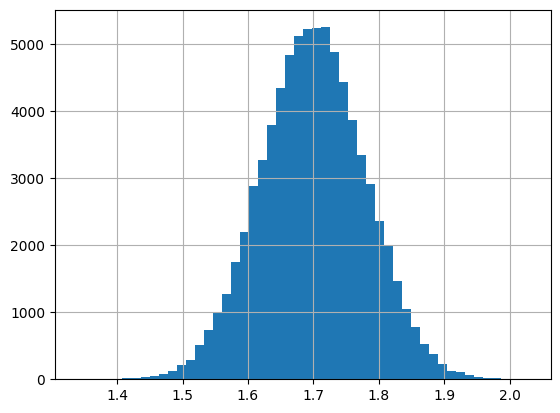

In [14]:
data.Altura.hist(bins=50)

In [16]:
normaltest(data.Altura)

NormaltestResult(statistic=0.19973093957002253, pvalue=0.9049591541967501)

In [17]:
stats_test, p_valor = normaltest(data.Altura)

In [18]:
p_valor <= significancia

False

___

# 2. Etapas do teste de hipótese

#### 2.1 formulação de hipóteses;

**Pontos importantes**

- De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa $H_1$.
- A hipótese nula sempre afirma uma igualdade ou propriedade popullacionall, de $H_1$ a desigualdade que nega $H_0$.
- No caso da hipótese nula a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$>=$" e "$<=$". Sempre complementar ao estabelecido pela hipotese alternativa.
- A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples.

#### 2.2 Escolha da distribuição amostral adequada;

**Pontos importantes**

- Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
- Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se ditribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
- Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido, deve-se utilziar a distribuição _t-Student_.

#### 2.3 Fixação da significância do teste $(a)$

Que define as regiões de aceitação e rejeição das hipóteses (os valores mais frequentes são 10%, 5% e 1%).

**Pontos importantes**
- O **nível de confiança** $(1-a)$ representa a probabilidade de aceerto da estimativa. De forma compllementar o **nivel de significancia** $(a)$ expressa a probabilidade de erro da estimativa.
- O **nível de confiança** representa o frau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exempllo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, de estarmos corretos.
    - **Unicaldal superior**: $H_1$ do tipo "$>$".
    - **Bicaldal**: $H_1$ do tipo "$\neq$".
    - **Unicaldal inferior**: $H_1$ do tipo "$<$".

#### 2.4 Cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

**Pontos importantes**

- Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
- Neste passo são obtidas as estatísticas amostrais necessárias para a execução do teste (média, desvio-padrão, graus de liberdade etc.)

#### 2.5 Aceitação ou rejeição da hipótese nula.

**Pontos importantes**

- No caso de o intervalo de aceitação conter a estatística-yesye, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
- No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira.
- A aceitação também se verifica com a probabilidade de cauda (p-valor): se a maior $a$, aceita-se $H_0$.

___

# 3. Testes paramétricos

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **testes paramétricos**.

#### 3.1 Teste Bicaldal

O teste de qualidade é muito utilizado em testes de qualidade. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafúsos, chaves e fechaduras).

**Problema:**

Uma empresa de sucos produz sucos de frutas em embalagens de 500 ml. Seu processo de produção é quase automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com orgãos fiscalizadores. Qaudno o vollume passa 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa extrai, periodicamente, amostras de 50 embalagens para monitorar o processo de produção. Para cada amostra, é realizado um teste de hipóteses para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um nível de significância de 5%.

Suponha que aghora que uma amostra de 50 embalagens foi selecionada e que a média amostral foi de 503,18 ml. Esse valor de média amostral é suficiente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?

In [52]:
np.random.seed(42)
n = 50

amostra = np.random.randint(490, 515, size=n)

amostra

array([496, 509, 504, 500, 497, 510, 496, 508, 512, 500, 500, 513, 510,
       493, 497, 513, 492, 511, 510, 491, 513, 501, 495, 491, 510, 490,
       501, 511, 501, 514, 506, 499, 505, 504, 504, 508, 501, 512, 509,
       514, 492, 494, 508, 496, 510, 498, 496, 507, 493, 514])

In [53]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra.head()

,Amostra
0,496
1,509
2,504
3,500
4,497


In [54]:
media_amostra = amostra.mean()[0]
media_amostra

C:\Users\God\AppData\Local\Temp\ipykernel_11564\2023031489.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_amostra = amostra.mean()[0]


503.18

In [56]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

C:\Users\God\AppData\Local\Temp\ipykernel_11564\1718920650.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  desvio_padrao_amostra = amostra.std()[0]


7.520556861709382

In [57]:
media = 500
significancia = 0.05
confianca = 1 - significancia

**Passo 1 - Forumlação das hipóteses $H_0$ e $H_1$**

_A hipótese nula sempre contem a alegação de igualdade_


$H_0 : \mu = 500$

$H_1 : \mu \neq 500$


**Passo 2 - Escolha da distribuição**

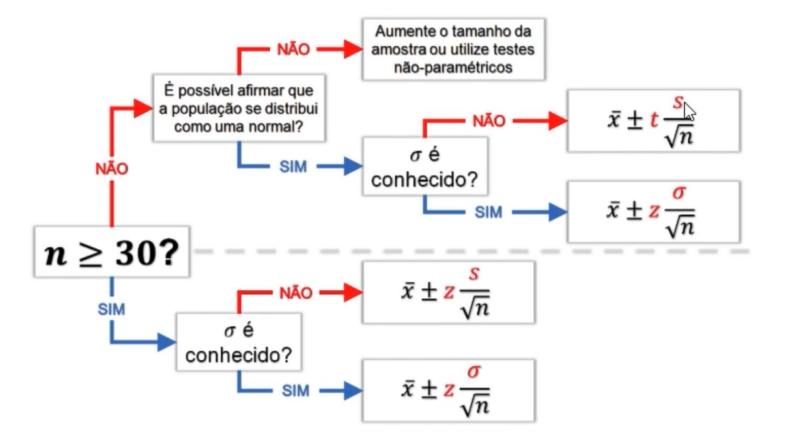

In [63]:
imagem = mpimg.imread('docs\\escolher_distribuicao.png')

plt.figure(figsize=(10,8))
plt.imshow(imagem)
plt.axis('off')
plt.show()

- O tamanho da amostra é maior que 30? Sim!
- O desvio padrão populacional é conhecido? Não!

**Passo 3 - Fixação da significância do teste $(a)$**

In [64]:
from scipy.stats import norm

In [65]:
probabilidade = (0.5 + (confianca /2))
probabilidade

0.975

**Obtendo $Z_{a/2}$**

In [66]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

**Passo 4 - Cálculo da estatistica-teste e verificação desse valor com as áreas de aceitação e rejeição do teste**


$$
Z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}
$$


In [67]:
z = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
z

2.989937587762792

**_Critério do valor crítico_**

**Teste Bicaldal**

**Rejeita $H_0$ se z menor igual a $-Z_{a/2}$ ou se z maior igual a $Z_{a/2}$**

In [68]:
z <= -z_alpha_2

False

In [69]:
z >= z_alpha_2

True

**Conclusão:**

Como a média amostral é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as emabalgens.